# **ZOMATO RESTAURANTS CLUSTERING & SENTIMENT ANALYSIS**

# **IMPORTING BASIC LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **DATASET LOADING**

In [2]:
meta_df_main=pd.read_csv('Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('Zomato Restaurant reviews.csv')

In [3]:
# Making Copy of meta Data
meta_df = meta_df_main.copy()

In [4]:
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
meta_df.shape

(105, 6)

In [6]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [7]:
review_df.shape

(10000, 7)

# **DATA PREPROCESSING**

In [8]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [9]:
meta_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [10]:
# Names of restaurants
meta_df['Name'].value_counts()

Name
Beyond Flavours                           1
Paradise                                  1
Flechazo                                  1
Shah Ghouse Hotel & Restaurant            1
Over The Moon Brew Company                1
                                         ..
IndiBlaze                                 1
Sweet Basket                              1
Angaara Counts 3                          1
Wich Please                               1
Republic Of Noodles - Lemon Tree Hotel    1
Name: count, Length: 105, dtype: int64

In [11]:
# Checking duplicate rows in dataset
meta_df.duplicated(keep='last').sum()

np.int64(0)

In [12]:
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

In [13]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [14]:
review_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

In [15]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [16]:
# Unique values in 'Rating' column
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [17]:
# Handling unwated values and changing string in float
review_df.loc[review_df['Rating'] == 'Like'] = np.nan
review_df['Rating']= review_df['Rating'].astype('float64')

In [18]:
print(review_df['Rating'].mean())

3.601044071880333


In [19]:
review_df['Rating'].fillna(3.6, inplace=True)

In [20]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54       0.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20       0.0  
2  2 Reviews , 3 Followers  5/24/2019 22:54       0.0  
3    1 Review , 1 Follower  5/24/2019 22:11       0.0  
4  3 Reviews , 2 Followers  5/24/2019 21:37       0.0

In [21]:
# Split 'Metadata' column into two temporary columns
review_df[['Reviews', 'Followers']] = review_df['Metadata'].str.split(',', expand=True)

# Extract and convert 'Reviews' and 'Followers' to numeric
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers'] = pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [22]:
# Dropping Metadata column
review_df = review_df.drop(['Metadata'], axis=1)

In [23]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [24]:
review_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [25]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [26]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [27]:
#Resetting the index after dropping null values
review_df.reset_index(inplace = True)

# **DATA ANALYSIS OF RESTAURANTS METADATA**

In [28]:
#Finding the top 10 restaurants by Cost
top_10_costly_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
top_10_costly_rest

Name  Cost
23                Collage - Hyatt Hyderabad Gachibowli  2800
35                    Feast - Sheraton Hyderabad Hotel  2500
0                                    10 Downing Street  1900
48   Jonathan's Kitchen - Holiday Inn Express & Suites  1900
20             Cascade - Radisson Hyderabad Hitec City  1800
102                    Zega - Sheraton Hyderabad Hotel  1750
74              Republic Of Noodles - Lemon Tree Hotel  1700
60               Mazzo - Marriott Executive Apartments  1700
9                                         Arena Eleven  1600
12                                              B-Dubs  1600

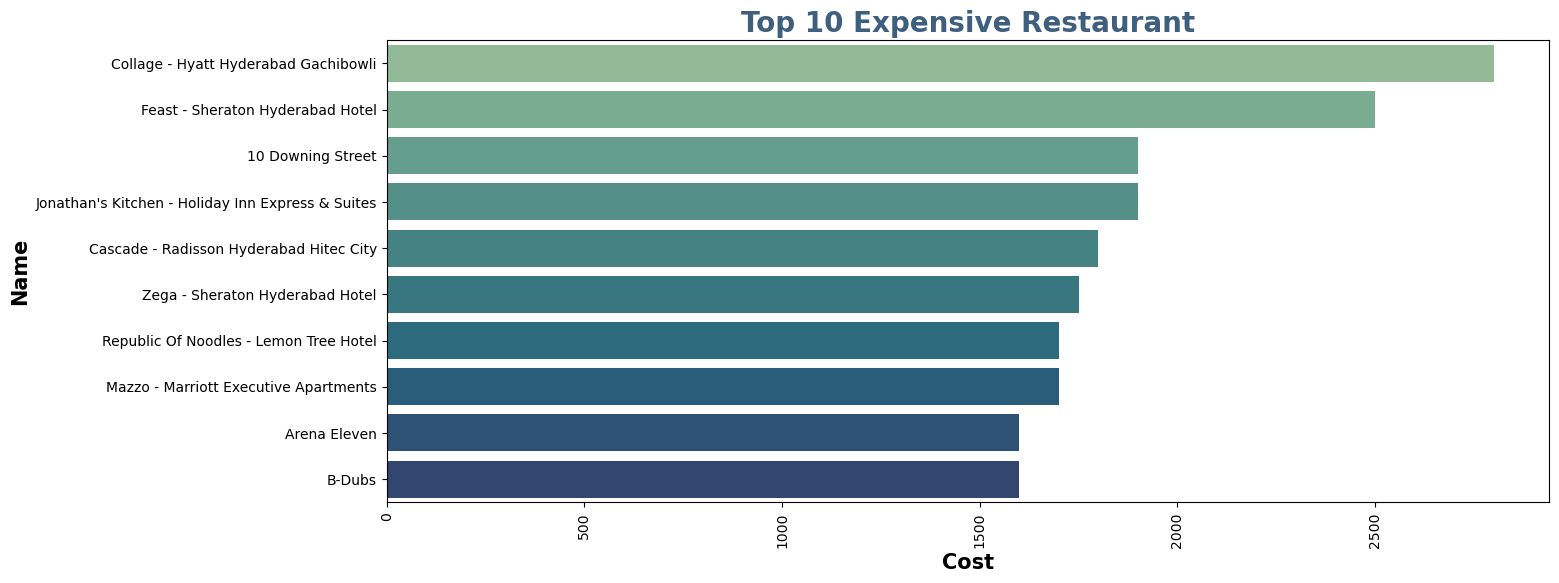

In [29]:
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='crest')
plt.show()

In [30]:
#Finding the top 10 affordable restaurants
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=True).head(10)
top_10_affor_rest

Name  Cost
7                        Amul   150
61        Mohammedia Shawarma   150
43         Hunger Maggi Point   200
11             Asian Meal Box   200
62              Momos Delight   200
50                  KS Bakers   200
83               Sweet Basket   200
100               Wich Please   250
79   Shah Ghouse Spl Shawarma   300
86                   Tempteys   350

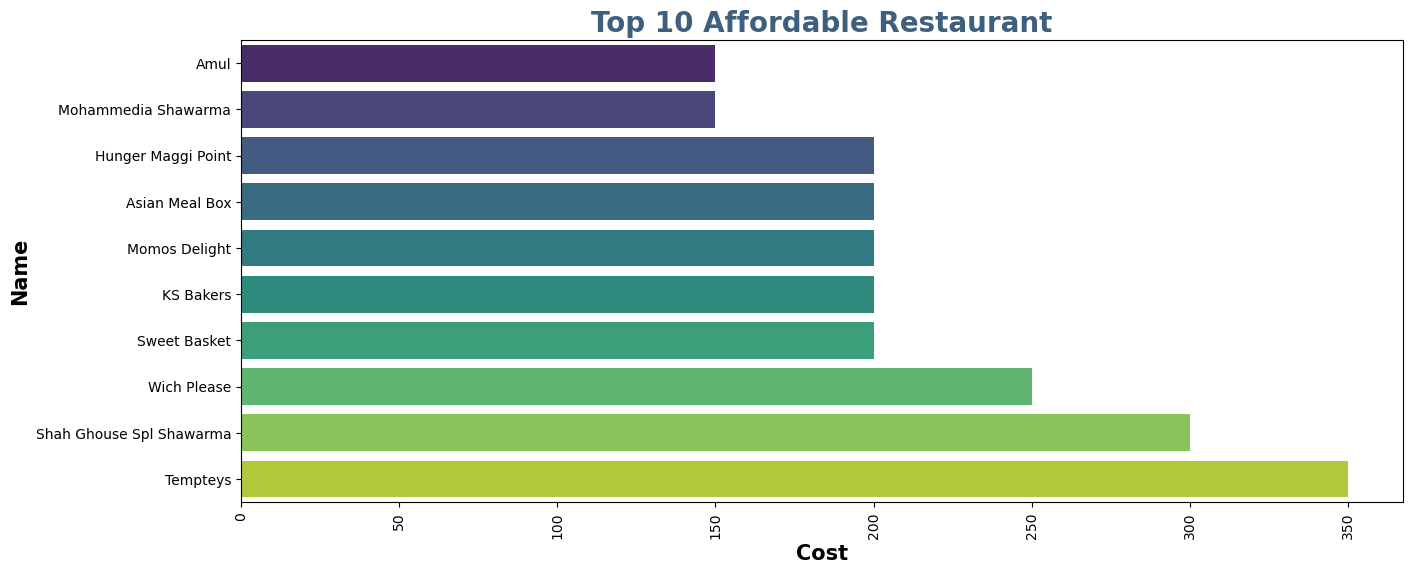

In [31]:
# Affordable price restaurants
plt.figure(figsize=(15,6))

x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

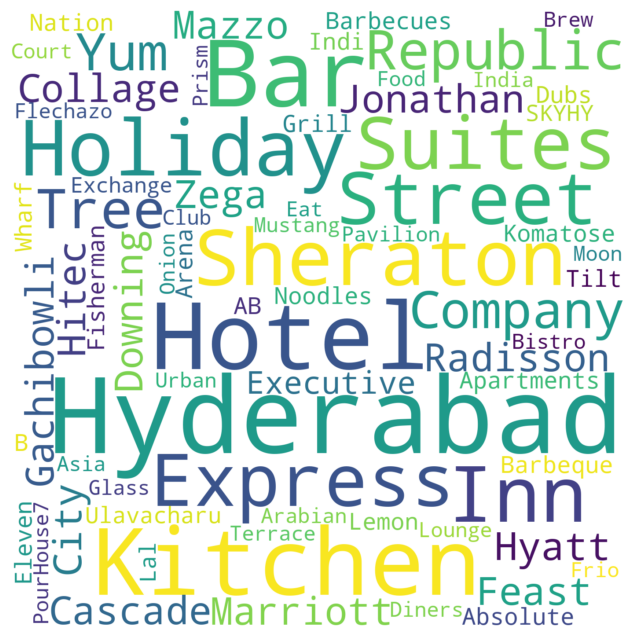

In [32]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Keywords for expensive retaurants : Hyderabad,Hotel,Barbecue,Bar,Suites etc.**

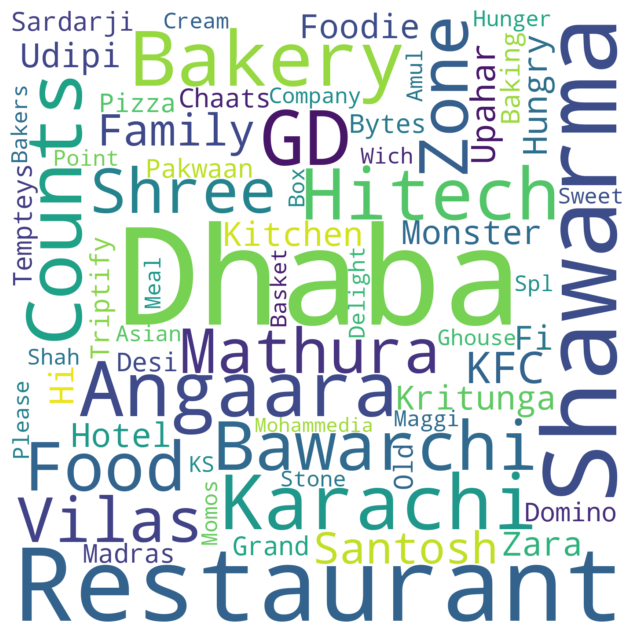

In [33]:
#Creating word cloud for affordable restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'white').generate(text)

#Display the generated word Cloud

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## **Keywords for expensive retaurants : Hyderabad,Hotel,Barbecue,Bar,Suites etc.**

# **DATA ANALYSIS OF REVIEW DATA**

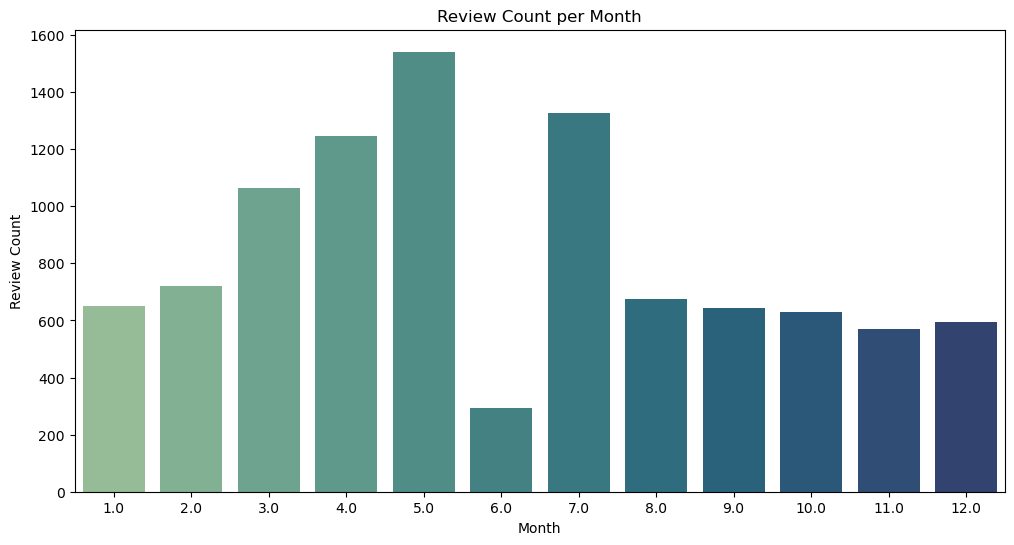

In [34]:
# Plotting No. of reviews given per month.
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=review_df, palette='crest')
plt.title('Review Count per Month')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.show()

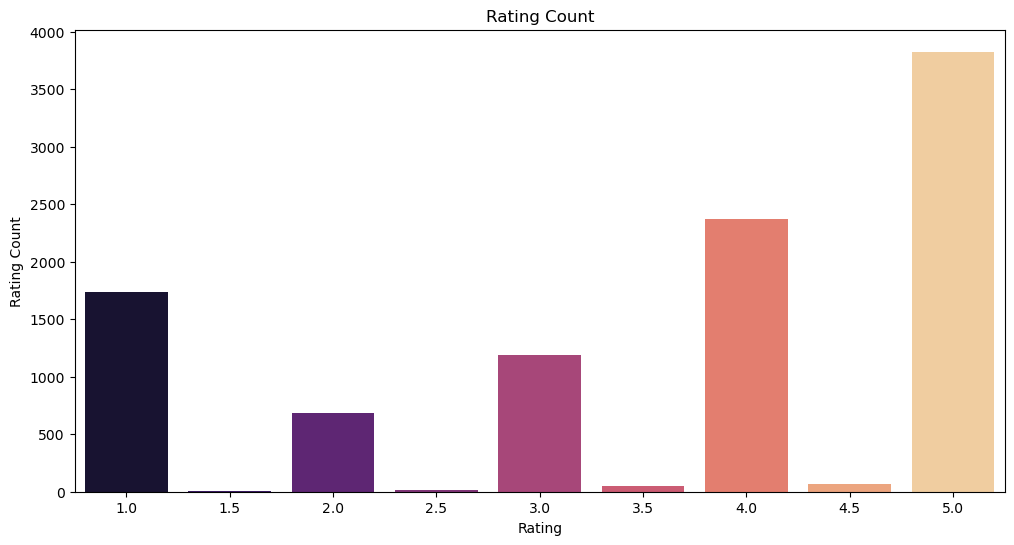

In [35]:
# Plotting Number of ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', data=review_df, palette='magma')
plt.title('Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.show()

In [36]:
#Top Reviewers
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:10]
top_reviewers.head()

Reviewer  Review_Count
654         Ankita            13
3855   Parijat Ray            13
2652         Kiran            12
7009  Vedant Killa            11
2311     Jay Mehta            11

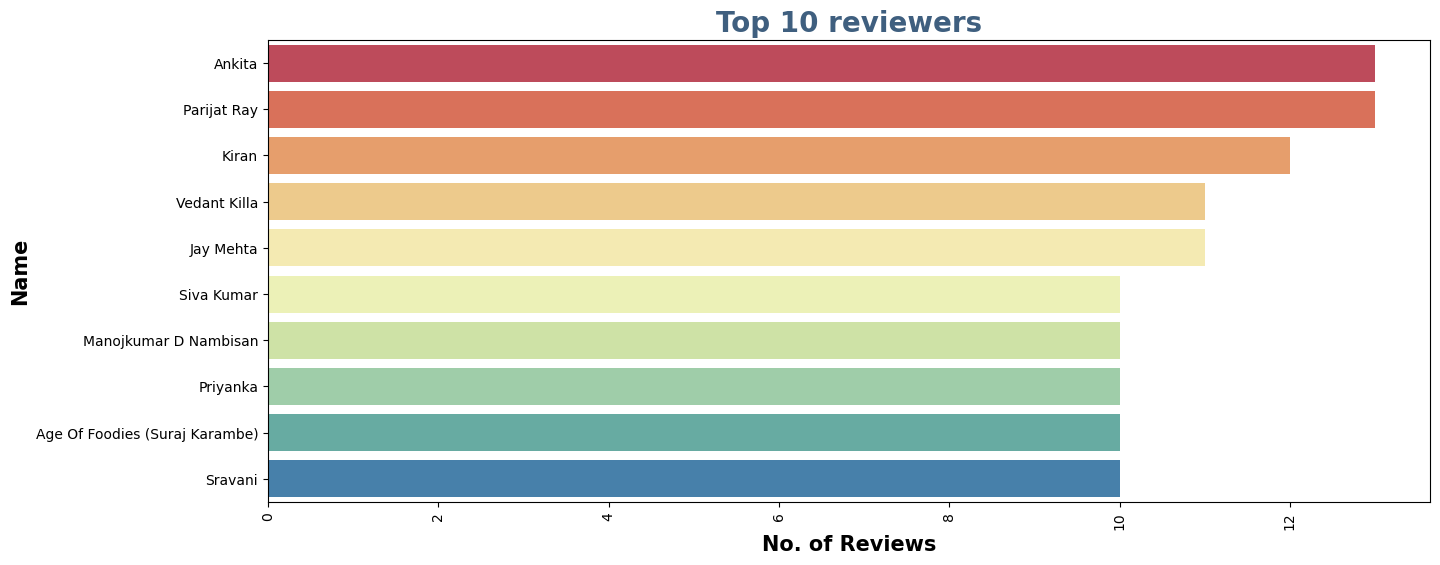

In [37]:
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 10 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='Spectral')
plt.show()

In [38]:
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:5]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

Reviewer  Review_Count  AverageRatings
2         Kiran            12        4.500000
3  Vedant Killa            11        4.000000
0        Ankita            13        3.923077
4     Jay Mehta            11        3.727273
1   Parijat Ray            13        3.192308

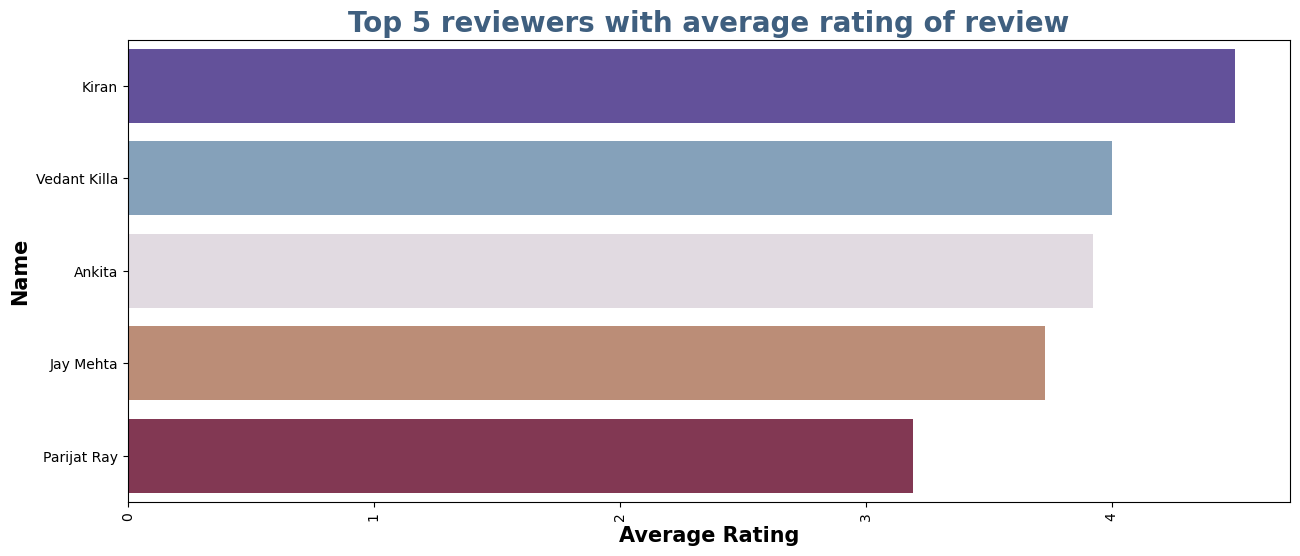

In [39]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 5 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='twilight_shifted')
plt.show()

In [40]:
# Review per hour
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

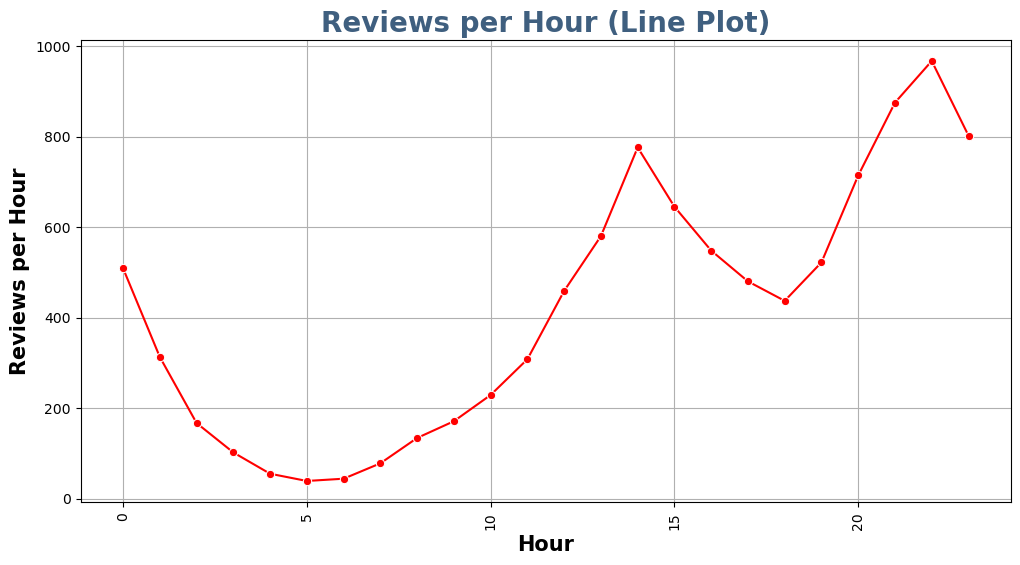

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Reviews_per_hour', data=reviews_hour, marker='o', color='red')
plt.title('Reviews per Hour (Line Plot)', fontsize=20, weight='bold', color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel('Reviews per Hour', weight='bold', fontsize=15)
plt.xlabel('Hour', weight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [42]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(np.float64(-0.5), np.float64(1399.5), np.float64(1399.5), np.float64(-0.5))

# **Cuisines Data Pre-processing & Analysis**

In [43]:
#Importing Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [45]:
#Function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [46]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [47]:
#Function for removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [48]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [49]:
# Removing repeating characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [50]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [51]:
#Cleaning numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [52]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [53]:
#Count of each cusine
from collections import Counter
text = ' '.join(meta_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [54]:
#Creating dataframe with Cusine frequency
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

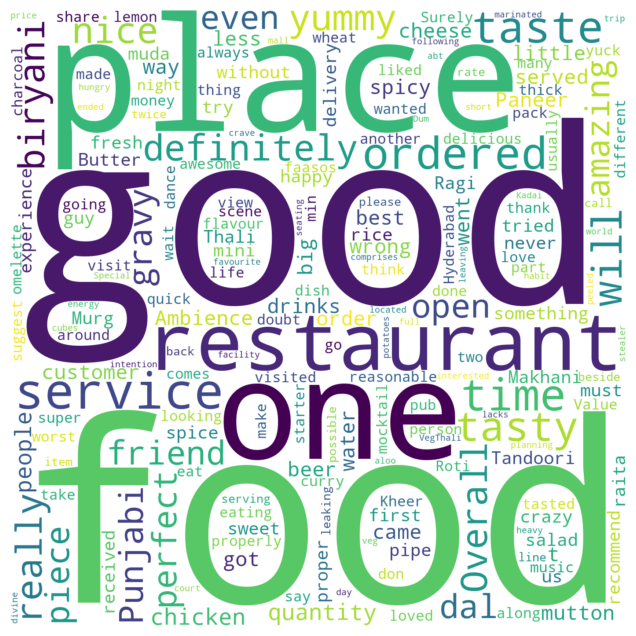

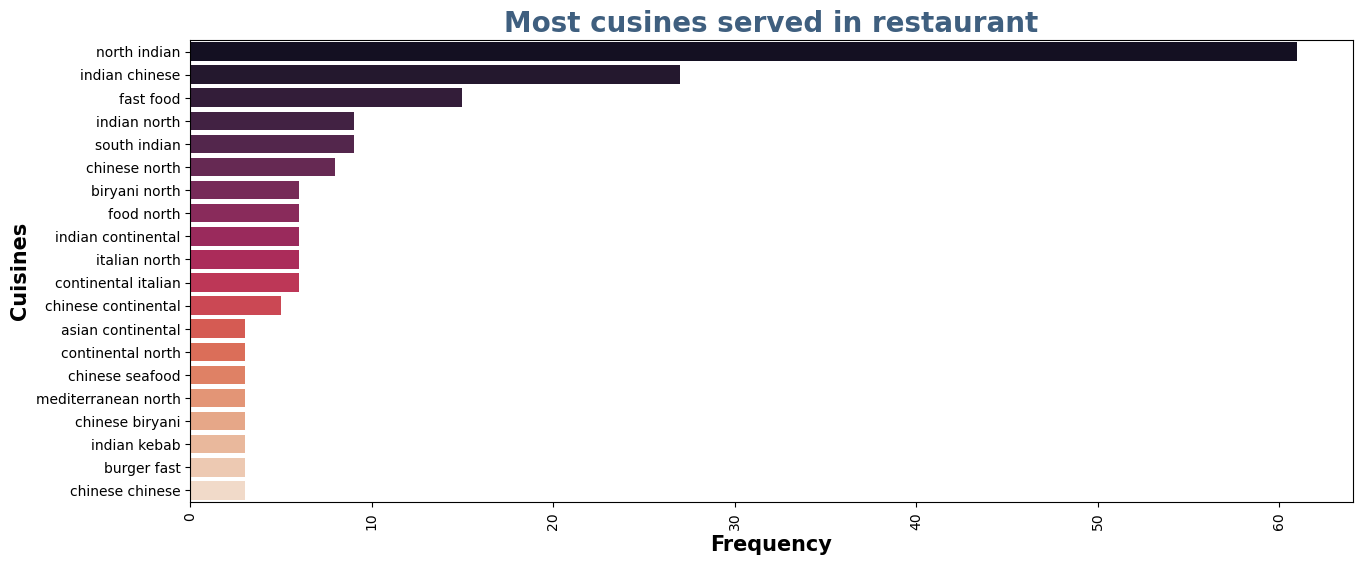

In [55]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("Most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisines",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="rocket")
plt.show()

In [56]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(np.float64(-0.5), np.float64(1399.5), np.float64(1399.5), np.float64(-0.5))

# **Important Keywords in Cuisines Data:**

---
north, indian, chinese, continental, american etc.



# **TEXT PREPROCESSING FOR SENTIMENT ANALYSIS**

---



In [57]:
#Stroing reviews in new dataframe
review= review_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [58]:
# removing punctuations
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

In [59]:
# Removing Stopwords
review_df['Review'] = review_df['Review'].apply(stopwords)

In [60]:
review=review_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [61]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [62]:
# Function for lemmatization
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [63]:
# Applying lematization
review=lemmatization_(review)

In [64]:
# function for removing extra spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [65]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [66]:
review=remove_non_leters(review)

In [67]:
# storing the reviews in a feature of df
review_df['Review']=review
review_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen das arun great guy behavior sincerety g...     5.0   
4  food goodwe order kodi drumstick basket mutton...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0

In [68]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [69]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [70]:
review_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen das arun great guy behavior sincerety g...     5.0   
4  food goodwe order kodi drumstick basket mutton...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0

# **SENTIMENT ANALYSIS WITH POLARITY & SUBJECTIVITY**

---



In [71]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [72]:
#Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [73]:
#Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [74]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [75]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [76]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [77]:
review_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen das arun great guy behavior sincerety g...     5.0   
4  food goodwe order kodi drumstick basket mutton...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  \
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0   
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0   
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0   
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0   
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0   

   Subjectivity  Polarity  Analysis  
0      0.720000  0.660000  Positive  
1      0.691667  0.708333  Positive  
2      0.675000  0.550000  Positive  
3      0.675000  0.750000  Positive  
4      0.566667  0.600000  Positive

In [78]:
review_df['Analysis'].value_counts()

Analysis
Positive    7492
Negative    1869
Neutral      593
Name: count, dtype: int64

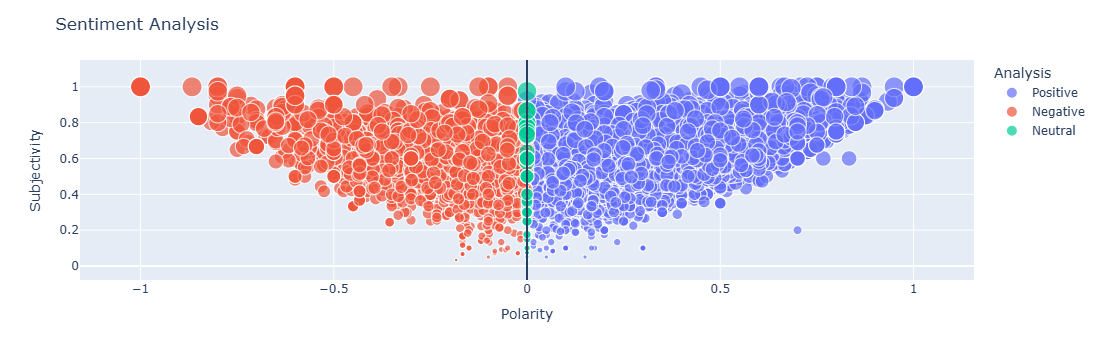

In [79]:
fig = px.scatter(review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

# **Data Preprocessing for Clustering**

---



In [80]:
# converting the cuisines to lower case
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower())

In [81]:
cuisine_df=meta_df_main.loc[:,['Name','Cost','Cuisines']]

In [82]:
# splitting the cuisine
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [83]:
cuisine_df.head()

Name   Cost  \
0                 Beyond Flavours    800   
1                        Paradise    800   
2                        Flechazo  1,300   
3  Shah Ghouse Hotel & Restaurant    800   
4      Over The Moon Brew Company  1,200   

                                            Cuisines  
0  [chinese, continental, kebab, european, southi...  
1                    [biryani, northindian, chinese]  
2      [asian, mediterranean, northindian, desserts]  
3  [biryani, northindian, chinese, seafood, bever...  
4  [asian, continental, northindian, chinese, med...

In [84]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

In [85]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [86]:
cuisine_df.head()

Name   Cost  american  andhra  arabian  asian  \
0                 Beyond Flavours    800         0       0        0      0   
1                        Paradise    800         0       0        0      0   
2                        Flechazo  1,300         0       0        0      1   
3  Shah Ghouse Hotel & Restaurant    800         0       0        0      0   
4      Over The Moon Brew Company  1,200         0       0        0      1   

   bakery  bbq  beverages  biryani  ...  northindian  pizza  salad  seafood  \
0       0    0          0        0  ...            1      0      0        0   
1       0    0          0        1  ...            1      0      0        0   
2       0    0          0        0  ...            1      0      0        0   
3       0    0          1        1  ...            1      0      0        1   
4       0    0          0        0  ...            1      0      0        0   

   southindian  spanish  streetfood  sushi  thai  wraps  
0            1        0           0      0     0      0  
1            0        0           0      0     0      0  
2            0        0           0      0     0      0  
3            0        0           0      0     0      0  
4            0        0           0      0     0      0  

[5 rows x 46 columns]

In [87]:
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [88]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)
review_df['Rating'] = review_df['Rating'].replace('Like', '4')
# Change data type of rating column to float
review_df['Rating']= review_df['Rating'].astype('float')
review_df.dropna(subset =['Review'], inplace=True)

# Average ratings of the each restaurant
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
ratings_df .sort_values(by='Rating',ascending = False).head(10)

Restaurant  Rating
3                 AB's - Absolute Barbecues    4.88
11                                   B-Dubs    4.81
2            3B's - Buddies, Bar & Barbecue    4.76
67                                 Paradise    4.70
35                                 Flechazo    4.66
87                           The Indi Grill    4.60
97          Zega - Sheraton Hyderabad Hotel    4.45
64               Over The Moon Brew Company    4.34
16                          Beyond Flavours    4.28
19  Cascade - Radisson Hyderabad Hitec City    4.26

In [89]:
# Merging two data sets
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [90]:
df_cluster.head()

Name   Cost  american  andhra  arabian  asian  \
0                 Beyond Flavours    800         0       0        0      0   
1                        Paradise    800         0       0        0      0   
2                        Flechazo  1,300         0       0        0      1   
3  Shah Ghouse Hotel & Restaurant    800         0       0        0      0   
4      Over The Moon Brew Company  1,200         0       0        0      1   

   bakery  bbq  beverages  biryani  ...  salad  seafood  southindian  spanish  \
0       0    0          0        0  ...      0        0            1        0   
1       0    0          0        1  ...      0        0            0        0   
2       0    0          0        0  ...      0        0            0        0   
3       0    0          1        1  ...      0        1            0        0   
4       0    0          0        0  ...      0        0            0        0   

   streetfood  sushi  thai  wraps                      Restaurant  Rating  
0           0      0     0      0                 Beyond Flavours    4.28  
1           0      0     0      0                        Paradise    4.70  
2           0      0     0      0                        Flechazo    4.66  
3           0      0     0      0  Shah Ghouse Hotel & Restaurant    3.21  
4           0      0     0      0      Over The Moon Brew Company    4.34  

[5 rows x 48 columns]

In [91]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [92]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       1 non-null      Sparse[int64, 0]
 4   andhra         1 non-null      Sparse[int64, 0]
 5   arabian        1 non-null      Sparse[int64, 0]
 6   asian          1 non-null      Sparse[int64, 0]
 7   bbq            1 non-null      Sparse[int64, 0]
 8   bakery         1 non-null      Sparse[int64, 0]
 9   beverages      1 non-null      Sparse[int64, 0]
 10  biryani        1 non-null      Sparse[int64, 0]
 11  burger         1 non-null      Sparse[int64, 0]
 12  cafe           1 non-null      Sparse[int64, 0]
 13  chinese        1 non-null      Sparse[int64, 0]
 14  continental    1 non-null      Sparse[int64

In [93]:
# Converting cost column into numerical type
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')

In [94]:
df_cluster['Cost']= df_cluster['Cost'].astype('float')

In [95]:
# Corelation Plot between Cost and rating
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'green'},height=6.27, aspect=11.7/8.27)

# **CLUSTERING**

In [96]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [97]:
# Ploting Grapgh for different size of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_
          for i in range(8)]
plt.figure(figsize=(13,7))
# Pass data as a dictionary to lineplot
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

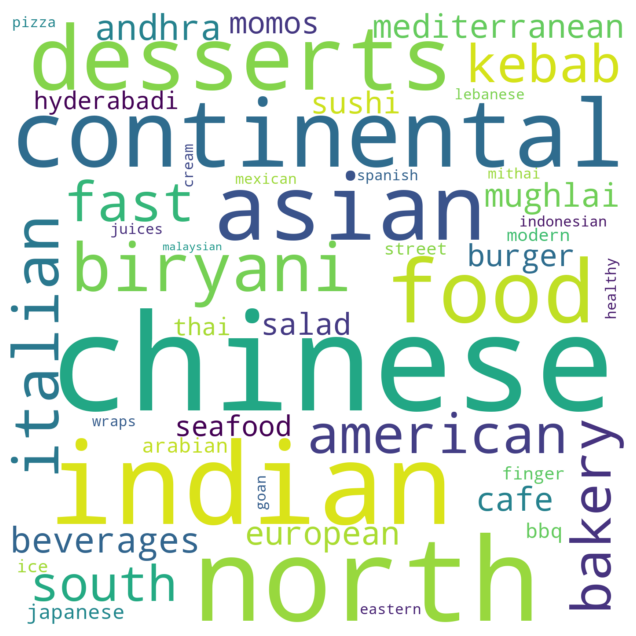

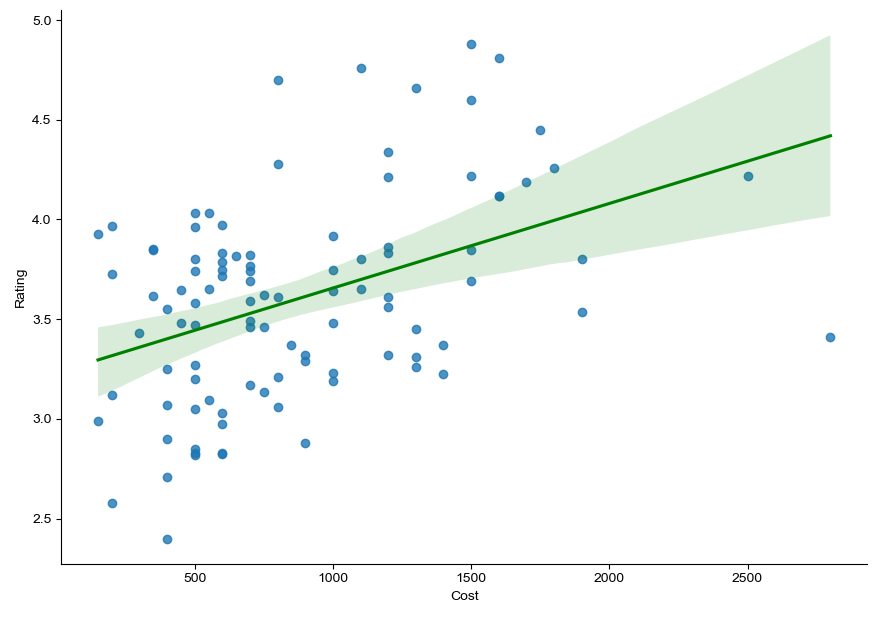

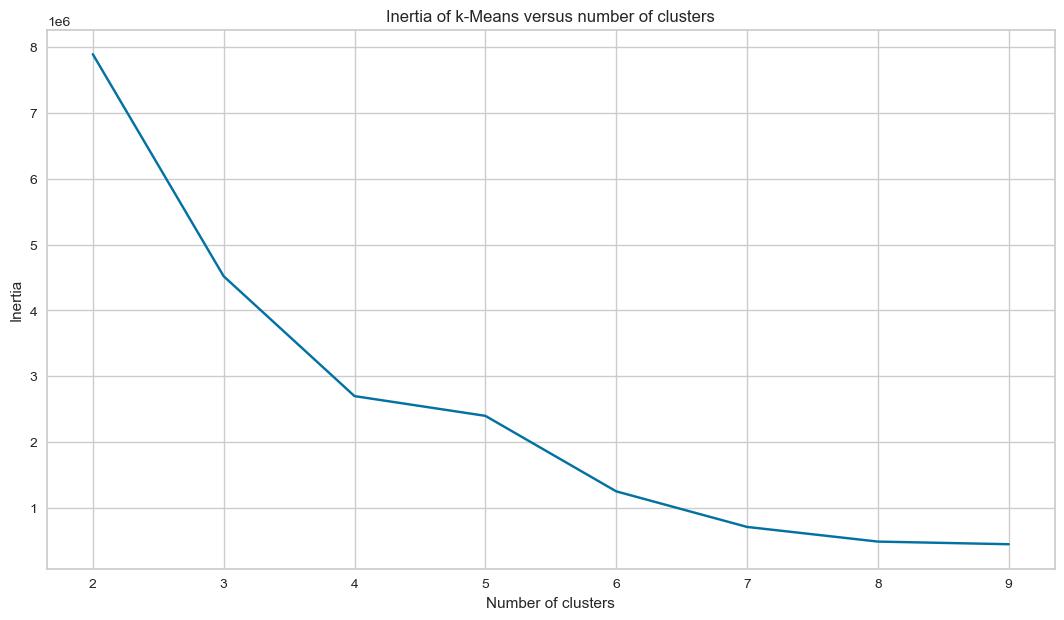

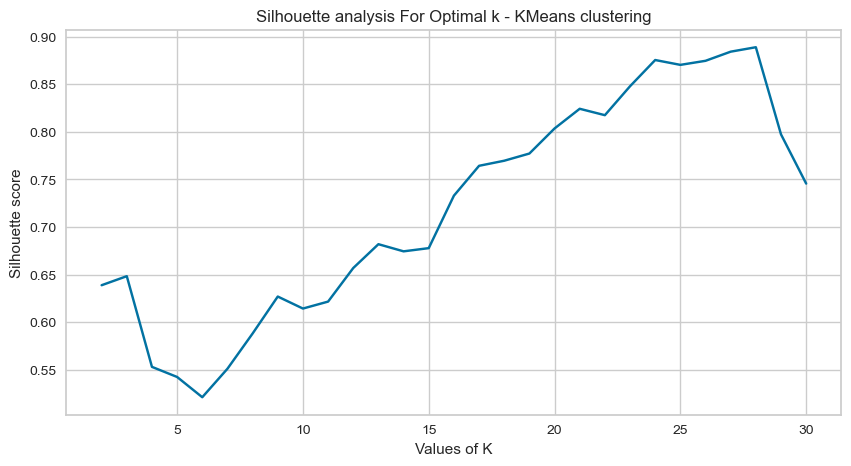

In [98]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(df_cluster.drop('Name',axis =1))
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(df_cluster.drop('Name',axis=1), cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [99]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [100]:
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [101]:
df_cluster['labels'] = cluster_lbl

In [102]:
# Ploting the Clusters
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

In [103]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [104]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    4
asian          3
italian        3
dtype: Sparse[int64, 0] 

Top cuisines in cluster 1
 northindian    31
chinese        25
biryani        14
dtype: Sparse[int64, 0] 

Top cuisines in cluster 2
 northindian    17
chinese        11
italian         7
dtype: Sparse[int64, 0] 

Top cuisines in cluster 3
 asian          2
continental    2
italian        2
dtype: Sparse[int64, 0] 

Top cuisines in cluster 4
 northindian    7
continental    4
chinese        3
dtype: Sparse[int64, 0] 



# **Principle Component Analysis**
---

In [105]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [106]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [108]:
X_pca = pca.fit_transform(X)

In [109]:
pca.components_

array([[ 7.85340405e-02, -2.15068900e-02, -6.02611569e-02,
         9.12720559e-02, -1.33315047e-03,  1.56518054e-03,
        -9.91978145e-03, -1.04018125e-01, -6.24298247e-02,
         2.02037104e-01, -9.54715157e-02, -1.52326922e-01,
         5.55901794e-01,  1.12670580e-01, -3.04772511e-01,
         1.51664649e-02, -2.54639645e-01,  1.90393423e-02,
         5.24493919e-03,  5.43216303e-03,  2.86487686e-02,
        -4.37383447e-02, -8.07420879e-04,  9.62784820e-02,
         1.87829062e-02,  1.19807207e-02,  6.05920573e-02,
        -1.41467007e-02,  0.00000000e+00,  1.75876141e-02,
         1.65889483e-02,  0.00000000e+00, -2.07918876e-02,
        -3.17214650e-02,  2.35190187e-02, -1.47564392e-02,
         6.14179278e-01, -1.99267957e-02,  1.31922212e-02,
         4.22951150e-02,  1.07174392e-01, -8.08389782e-03,
        -2.03461208e-02,  4.55148350e-03, -1.86704074e-03,
        -2.25277224e-02,  4.59640481e-02],
       [ 2.44417454e-01,  1.74467375e-01, -1.08735172e-02,
        -1.08

In [110]:
plt.figure(figsize=(13,7))

# Recalculate scores (similar to previous calculation with 'scores')
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_
           for i in range(8)]

sns.lineplot(x=np.arange(2, 10), y=scores1)  # Pass x and y as keyword arguments
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

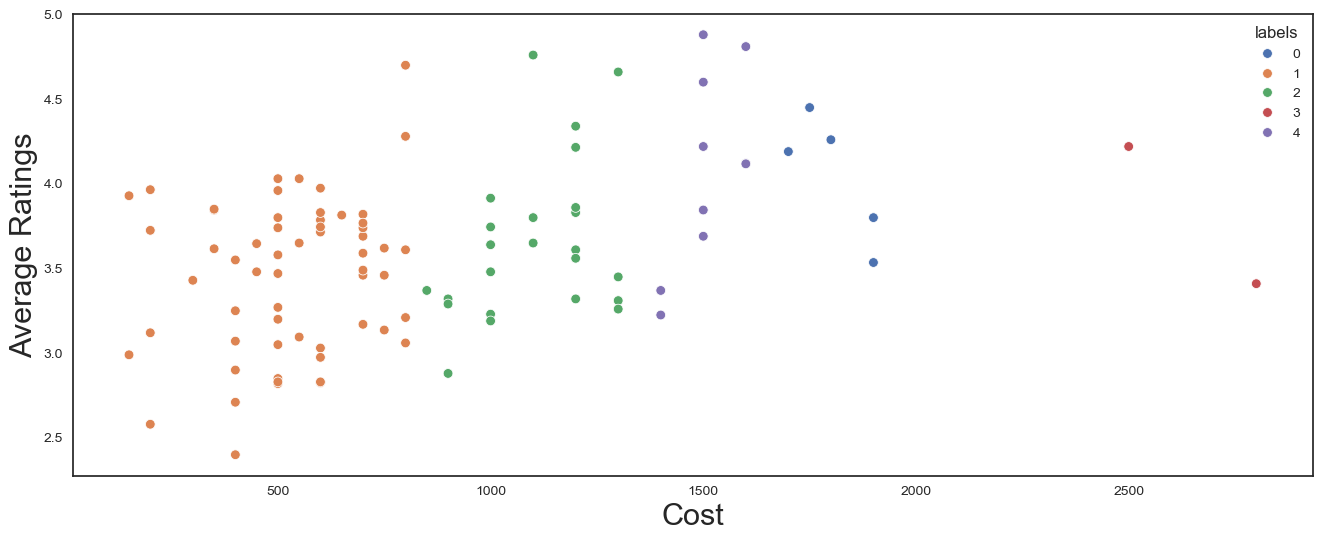

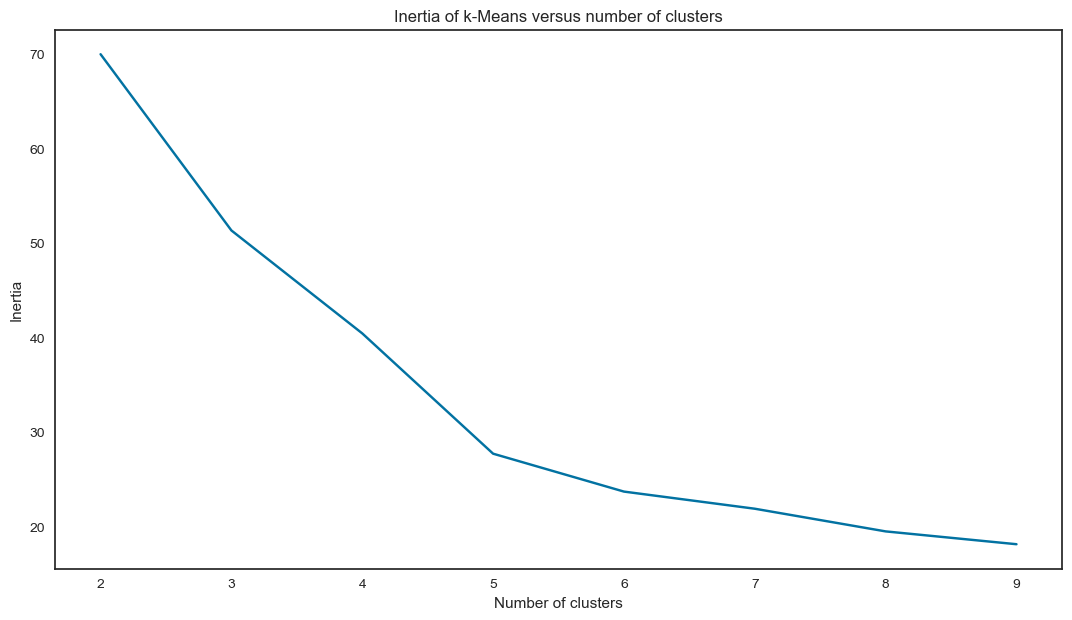

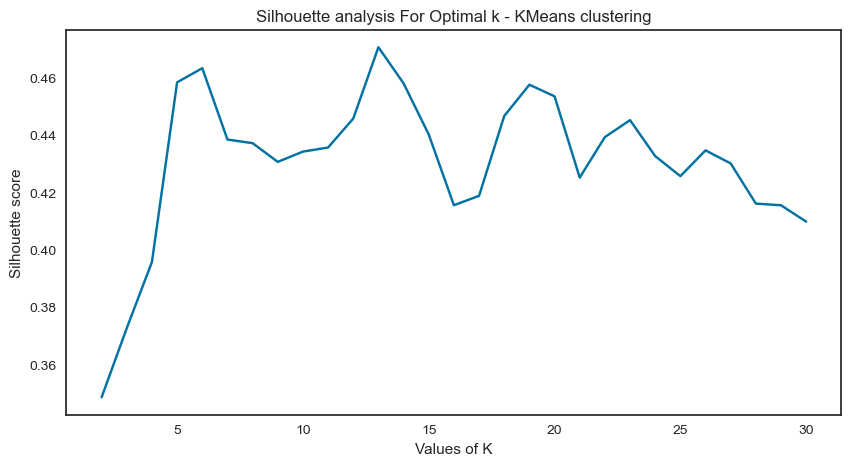

In [111]:
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [112]:
# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=33)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=33)

In [113]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(27.807492115017524, np.float64(0.45842163006828807))


In [114]:
df_cluster['kmeans_cluster'] = kmeans.labels_

In [115]:
plt.figure(figsize=(10,7))
q = sns.countplot(x='kmeans_cluster',data=df_cluster)
plt.title('Zomato restaurant clustering - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [116]:
# Ploting different clusters with PCA
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='kmeans_cluster', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

Text(0.5, 0, 'PC1')

In [117]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()


list_of_df = [df_0,df_1,df_2,df_3,df_4]

# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 kmeans_cluster    11
northindian        4
italian            3
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 1 
 kmeans_cluster    104
northindian        31
chinese            25
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 2 
 kmeans_cluster    51
northindian       17
chinese           11
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 3 
 asian          2
continental    2
italian        2
dtype: Sparse[int64, 0] 

Top Cuisines in Cluster 4 
 kmeans_cluster    16
northindian        7
continental        4
dtype: Sparse[int64, 0] 



# **CONCLUSION**

---
1. The North Indian, chinese and fast food cuisines are popular among the food enthusiasists
2. Also these cuisines have recieved maximum reviews and ratings among other cusines categories.
3. There is also strong possibility that these cuisines might be served on a large in top expensive restaurants, based on there cost & ratings correlation.
---

